In [1]:
import pandas as pd
import numpy as np

# Loading & Cleaning

In [3]:
#Load the data
hr_data = pd.read_csv("HR-Employee-Attrition.csv")
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
#Missing values check
hr_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#Check the structure of dataset
hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [7]:
#Columns of dataset
hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Take a peek

For this exercise, our aim is predict the employee attrition. It is important to see which variables are contibuting the most in attrition. But before that we need to know if the variable are any where correlated i.e Data Exploration

There are many continuous variables where the we can have a look at their distribution and create a grid of pairplot but that would be too much as there are so mnay variables.


In [18]:
#Lets create a dataframe with only numeric variables
hr_data_num = hr_data[['Age','DailyRate','DistanceFromHome', 'Education','EmployeeNumber', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel','JobSatisfaction','MonthlyIncome', 
                        'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 
                       'RelationshipSatisfaction', 'StockOptionLevel',
                       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                       'YearsWithCurrManager']].copy()

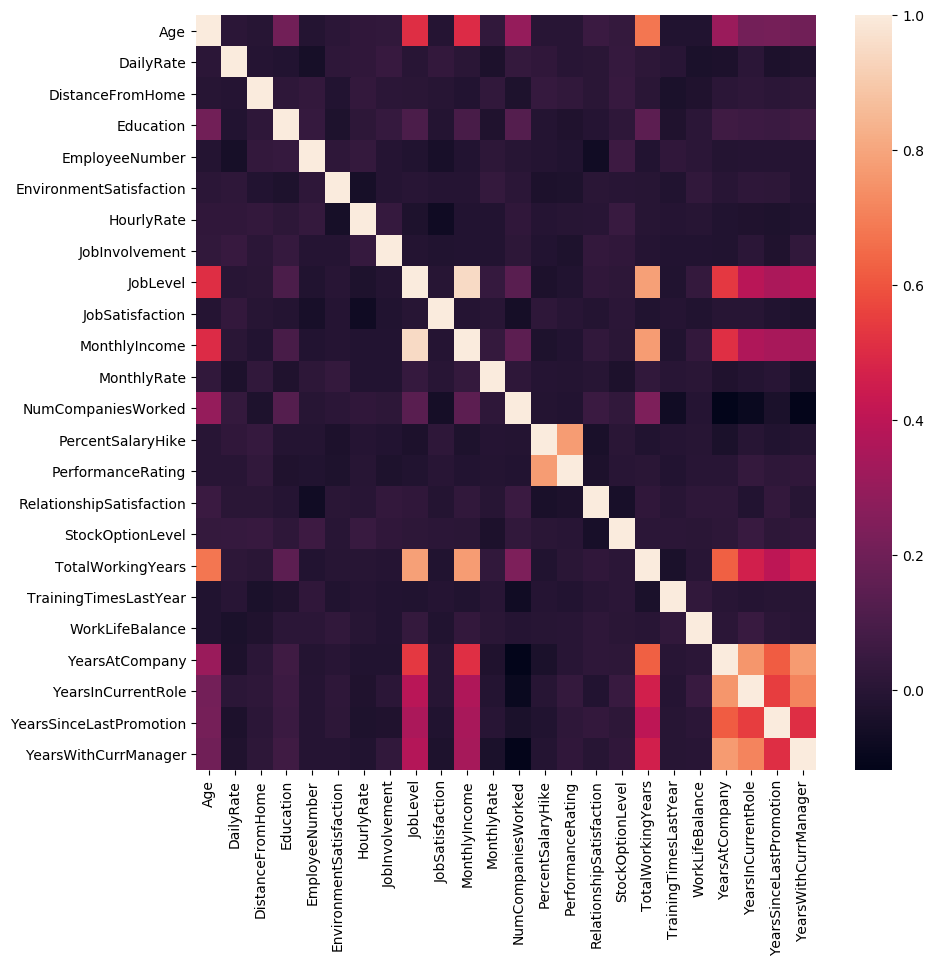

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(hr_data_num.corr())

In [28]:
#Let's remove the strongly correlated variables
hr_data_uc = hr_data_num[['Age','DailyRate','DistanceFromHome', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel','JobSatisfaction', 
                       'RelationshipSatisfaction', 'StockOptionLevel',
                        'TrainingTimesLastYear']].copy()

hr_data_uc.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear
0,41,1102,1,2,94,3,2,4,1,0,0
1,49,279,8,3,61,2,2,2,4,1,3
2,37,1373,2,4,92,2,1,3,2,0,3
3,33,1392,3,4,56,3,1,3,3,0,3
4,27,591,2,1,40,3,1,2,4,1,3


In [29]:
#Copy categorical data
hr_data_cat = hr_data[['Attrition', 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole','MaritalStatus',
                       'Over18', 'OverTime']].copy()
hr_data_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [30]:
Num_val = {'Yes':1, 'No':0}
hr_data_cat['Attrition'] = hr_data_cat["Attrition"].apply(lambda x: Num_val[x])
hr_data_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,0,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,1,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,0,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,0,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [31]:
hr_data_cat = pd.get_dummies(hr_data_cat)
hr_data_cat.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,1
1,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,1,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,1
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [34]:
hr_data_final = pd.concat([hr_data_num, hr_data_cat], axis=1)
hr_data_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,2,3,61,2,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,0,1,0,1,1,0


In [35]:
from sklearn.cross_validation import train_test_split

target = hr_data_final['Attrition']
features = hr_data_final.drop('Attrition', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=10)

C:\Users\Natasha Sharma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
from sklearn.metrics import accuracy_score
test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)

0.8418367346938775

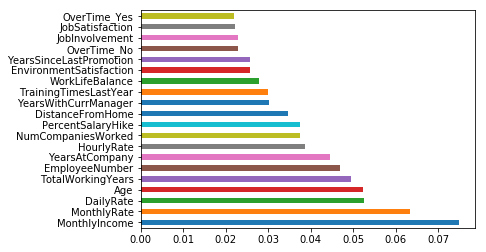

In [49]:
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')